In [1]:
import pandas as pd

In [3]:
df=pd.read_csv("/content/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


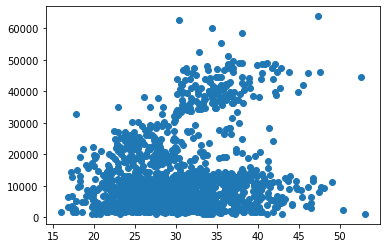

In [4]:
import matplotlib.pyplot as plt
plt.scatter (df["bmi"],df['charges'])
plt.show()

In [5]:
x = df[["bmi"]]
y = df[['charges']]

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=160)

In [6]:
y_train

,charges
761,2416.95500
391,2138.07070
1167,4529.47700
1136,7623.51800
57,34303.16720
...,...
1211,23563.01618
385,1261.85900
943,1628.47090
1178,2899.48935


In [7]:
x_train

,bmi
761,35.200
391,37.430
1167,24.600
1136,25.000
57,31.680
...,...
1211,34.100
385,34.400
943,22.610
1178,34.865


In [8]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [9]:
x_test

,bmi
917,22.895
764,25.175
609,37.800
884,26.695
461,30.000
...,...
1325,33.535
582,45.430
1169,34.105
705,32.900


In [10]:
y_test

,charges
917,35069.37452
764,9095.06825
609,39241.44200
884,4877.98105
461,22144.03200
...,...
1325,13143.33665
582,6356.27070
1169,6112.35295
705,5375.03800


In [11]:
y_pred = LR.predict(x_test)
y_pred

array([[10302.21941548],
       [11187.7492973 ],
       [16091.17682268],
       [11778.10255184],
       [13061.73249017],
       [11999.48502229],
       [10966.36682684],
       [10424.56235968],
       [13838.51308825],
       [14287.10388364],
       [14139.51557001],
       [11585.84935381],
       [11935.40062295],
       [15578.50162795],
       [15594.03723991],
       [13372.4447294 ],
       [12220.86749274],
       [14914.35421659],
       [ 9527.3807689 ],
       [12147.07333593],
       [10818.77851321],
       [12304.37140704],
       [ 9869.16423205],
       [15294.97670965],
       [16867.95742077],
       [12556.82510142],
       [20079.94519383],
       [13993.86920787],
       [12906.37637055],
       [ 9269.10122004],
       [ 9121.5129064 ],
       [11430.4932342 ],
       [15275.5571947 ],
       [ 9269.10122004],
       [13756.95112545],
       [14471.58927569],
       [12479.14704161],
       [14809.48883585],
       [12811.22074729],
       [13659.85355069],


In [12]:
y_test

,charges
917,35069.37452
764,9095.06825
609,39241.44200
884,4877.98105
461,22144.03200
...,...
1325,13143.33665
582,6356.27070
1169,6112.35295
705,5375.03800


In [13]:
from sklearn.metrics import mean_squared_error,r2_score

print("MSE", mean_squared_error(y_test,y_pred))

import numpy as np

print ("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

print("R2 score", r2_score(y_test, y_pred))

MSE 125538453.50260621
RMSE 11204.394383571394
R2 score 0.04680965102736745


TypeError: ignored

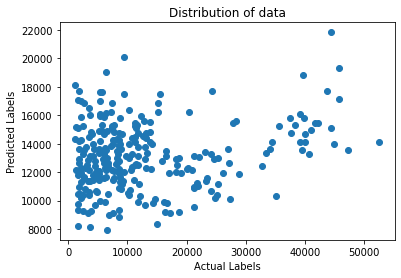

In [15]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Distribution of data')
# overlay the regression line
z = np.polyfit(y_test,y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Train the model
model = DecisionTreeRegressor().fit(x_train, y_train)
print (model, "\n")

# Visualize the model tree
tree = export_text(model)
print(tree)

DecisionTreeRegressor() 

|--- feature_0 <= 30.17
|   |--- feature_0 <= 22.66
|   |   |--- feature_0 <= 20.27
|   |   |   |--- feature_0 <= 17.72
|   |   |   |   |--- feature_0 <= 17.34
|   |   |   |   |   |--- feature_0 <= 17.01
|   |   |   |   |   |   |--- feature_0 <= 16.39
|   |   |   |   |   |   |   |--- value: [1694.80]
|   |   |   |   |   |   |--- feature_0 >  16.39
|   |   |   |   |   |   |   |--- value: [3167.46]
|   |   |   |   |   |--- feature_0 >  17.01
|   |   |   |   |   |   |--- feature_0 <= 17.24
|   |   |   |   |   |   |   |--- value: [14455.64]
|   |   |   |   |   |   |--- feature_0 >  17.24
|   |   |   |   |   |   |   |--- value: [9853.72]
|   |   |   |   |--- feature_0 >  17.34
|   |   |   |   |   |--- feature_0 <= 17.39
|   |   |   |   |   |   |--- value: [2775.19]
|   |   |   |   |   |--- feature_0 >  17.39
|   |   |   |   |   |   |--- feature_0 <= 17.53
|   |   |   |   |   |   |   |--- value: [2585.27]
|   |   |   |   |   |   |--- feature_0 >  17.53
|   |   |   |

MSE: 207904085.51826534
RMSE: 14418.879482063276
R2: -0.5785774183037653


TypeError: ignored

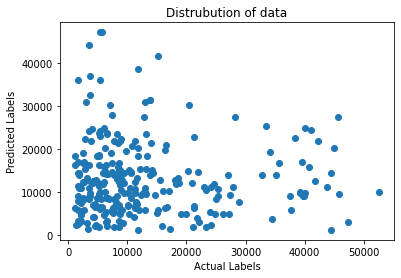

In [21]:
y_pred= model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, y_pred)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Distrubution of data')
# overlay the regression line
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [25]:
Y_pred = m * x_test + c
print("Predicted value is", y_pred)
print("Actual value is", y_test)

Predicted value is [13985.61338333  5688.6305      9877.6077     18291.19605
  2904.088      12831.99344667  6815.48695     8285.11123333
  6964.1039      5093.75495     9658.1825     12375.0693
  4746.344      27498.1707     27498.1707     18328.653
  4922.7154      6570.4078      1832.094      14690.04361
 22395.74424     7501.645      20167.33603    22581.8225
  5840.11213333  7727.36166667  9748.9106     12150.923522
 14372.22463    12250.60965     5458.04645     5339.17483333
 10774.65516    12250.60965    30871.584735   24285.504776
 11799.22912    31521.60406     6393.60345    11353.2276
  8078.26765    13357.2487     25307.26565     7160.094
 14372.22463     4790.75923333  8285.11123333  4239.89265
  8694.6325     11012.8915      4239.89265     9853.7176
 14108.5153      6360.9936      6798.0999     11846.3097
 17085.2676      3201.24515    24759.64125    16297.846
 14394.93655    13974.45555     2913.569      37165.1638
 20890.4553      9048.0273      5116.5004     14503.1954
